In [2]:
%matplotlib inline

In [3]:
import datetime
print(datetime.datetime.now())

2019-06-29 11:56:03.542463


In [4]:
import numpy as np
from astropy import units as u

In [5]:
import pylab as pl
pl.rcParams['figure.figsize'] = (16,8)

In [6]:
import sys
sys.path.append('/lustre/naasc/users/aginsbur/repos/reduction/reduction/')
import imp, diagnostic_images
imp.reload(diagnostic_images)
from diagnostic_images import load_images, show
from spectral_cube import SpectralCube
import spectral_cube
import warnings
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.StokesWarning)
warnings.filterwarnings(action='ignore', category=spectral_cube.utils.BeamWarning)

In [7]:
import os
os.chdir("/lustre/lard/projects/ALMA_IMF/2017.1.01355.L/imaging_results")

Text(0.5, 1.0, 'Custom Mask')

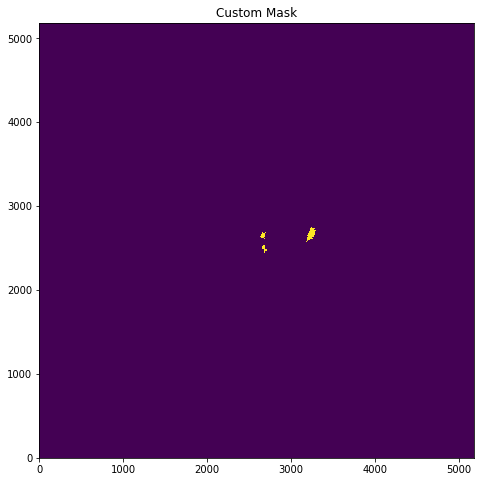

In [7]:
mask = SpectralCube.read('W51-E_B3_dirty_robust0_12M_mask.mask', format='casa_image')[0]
pl.imshow(mask.value, origin='lower', interpolation='none')
pl.title("Custom Mask")

In [8]:
imgs_dirty_b3, cubes_dirty_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_dirty')

In [9]:
imgs_before_b3, cubes_before_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0')

In [10]:
imgs_after_b3, cubes_after_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal1')

In [11]:
imgs_after2_b3, cubes_after2_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal2')

In [12]:
imgs_after3_b3, cubes_after3_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal3')

In [13]:
imgs_after4_b3, cubes_after4_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal4')

In [14]:
imgs_after5_b3, cubes_after5_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal5')

In [15]:
imgs_after6_b3, cubes_after6_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal6')

In [16]:
imgs_after7_b3, cubes_after7_b3 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal7')

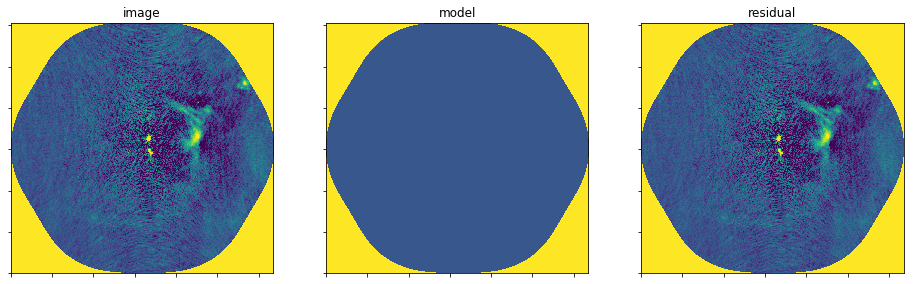

In [17]:
show(imgs_dirty_b3, vmin=-0.001, vmax=0.01)

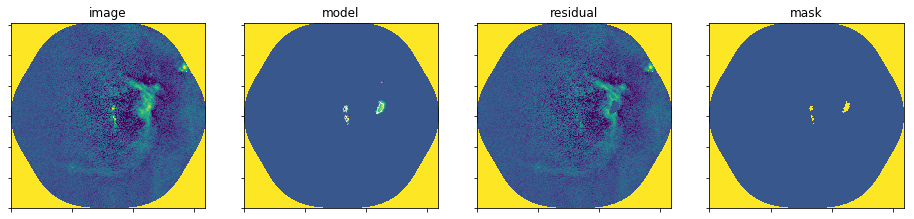

In [18]:
show(imgs_before_b3, vmin=-0.001, vmax=0.01)

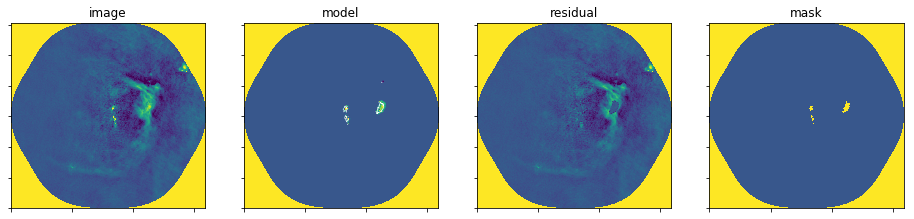

In [19]:
show(imgs_after_b3, vmin=-0.001, vmax=0.01)

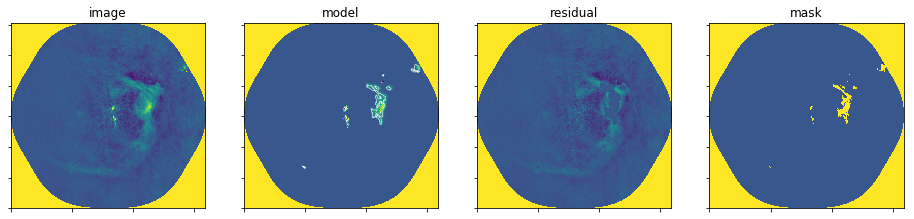

In [20]:
show(imgs_after2_b3, vmin=-0.001, vmax=0.01)

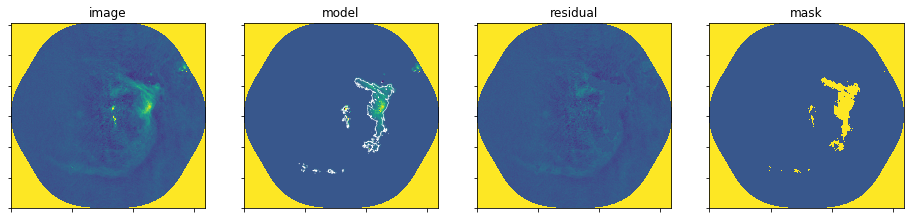

In [21]:
show(imgs_after3_b3, vmin=-0.001, vmax=0.01)

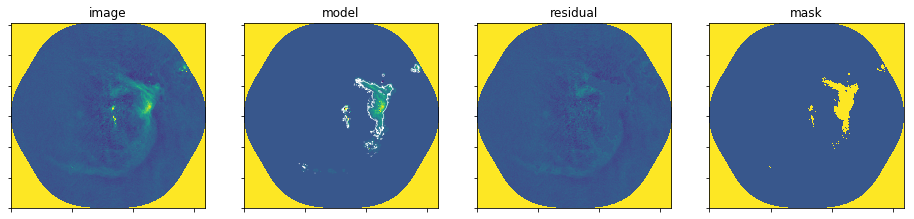

In [22]:
show(imgs_after4_b3, vmin=-0.001, vmax=0.01)

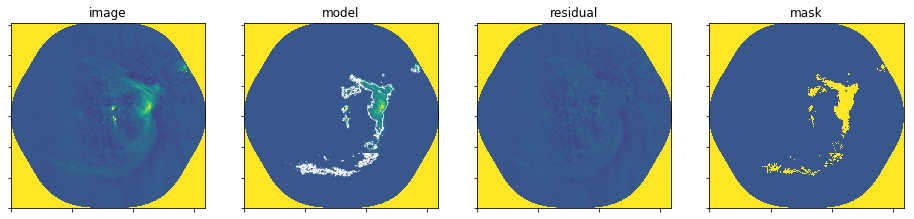

In [23]:
show(imgs_after5_b3, vmin=-0.001, vmax=0.01)

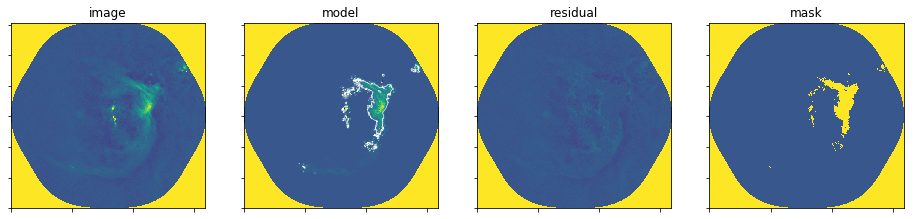

In [24]:
show(imgs_after6_b3, vmin=-0.001, vmax=0.01)

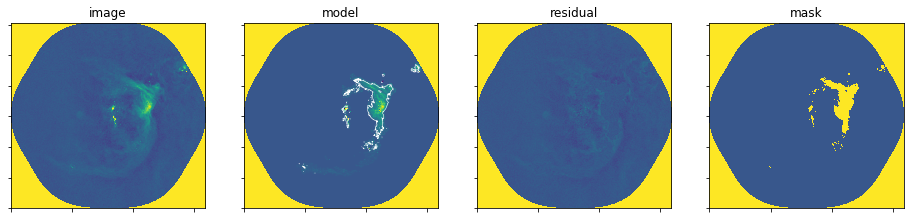

In [25]:
show(imgs_after7_b3, vmin=-0.001, vmax=0.01)

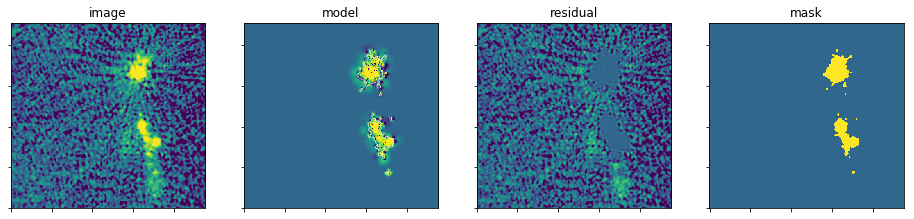

In [26]:
show(imgs_before_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

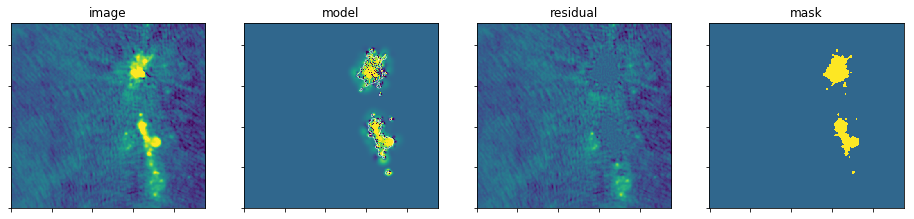

In [27]:
show(imgs_after_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

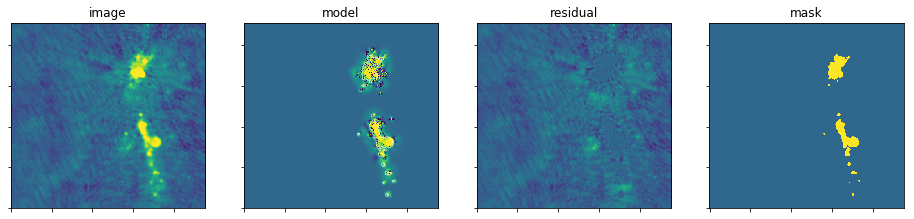

In [28]:
show(imgs_after2_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

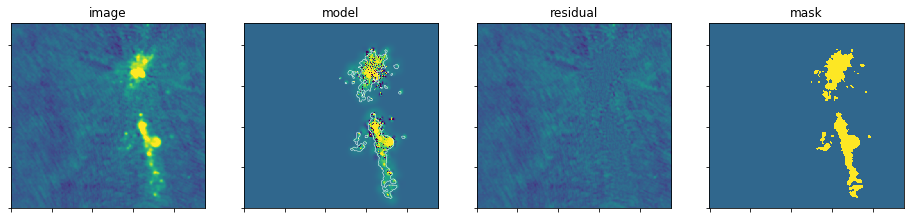

In [29]:
show(imgs_after3_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

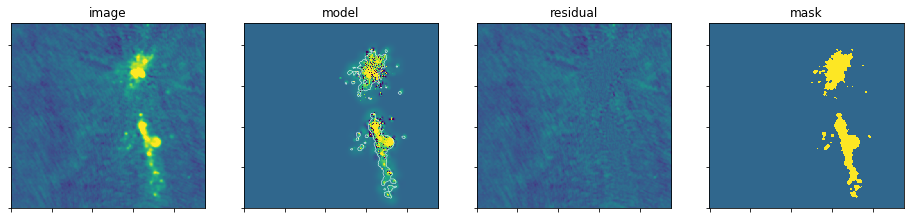

In [30]:
show(imgs_after4_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

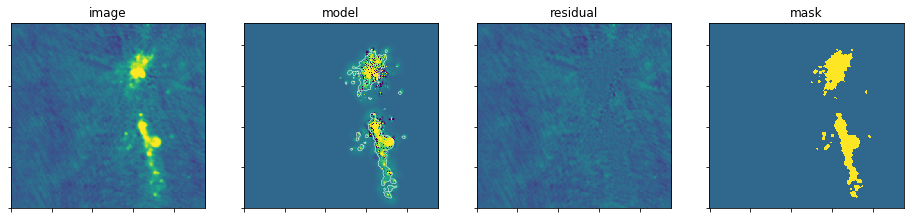

In [31]:
show(imgs_after5_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

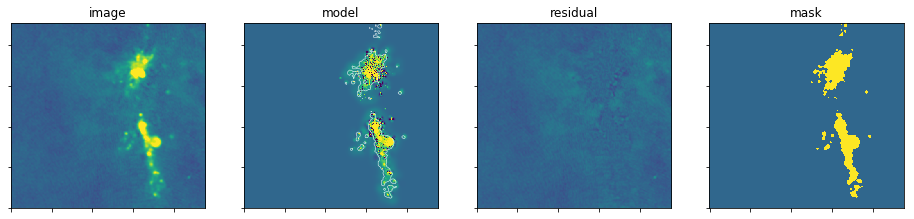

In [32]:
show(imgs_after6_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

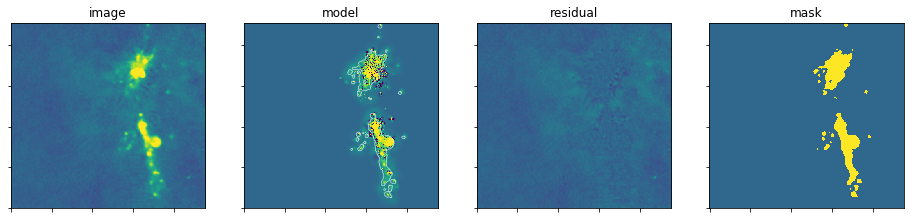

In [33]:
show(imgs_after7_b3, vmin=-0.001, vmax=0.0075, zoom=0.15)

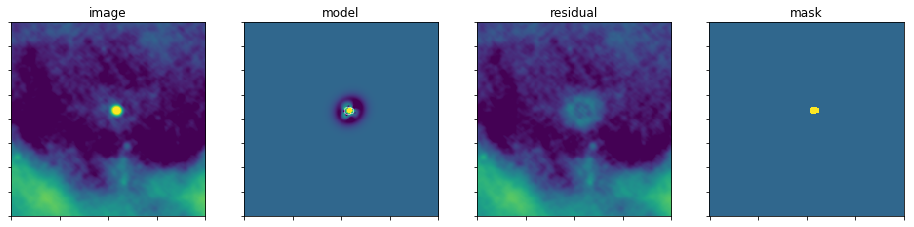

In [34]:
show(imgs_after_b3, vmin=-0.001, vmax=0.0075, zoom=[slice(1950,2150), slice(2150,2350)])

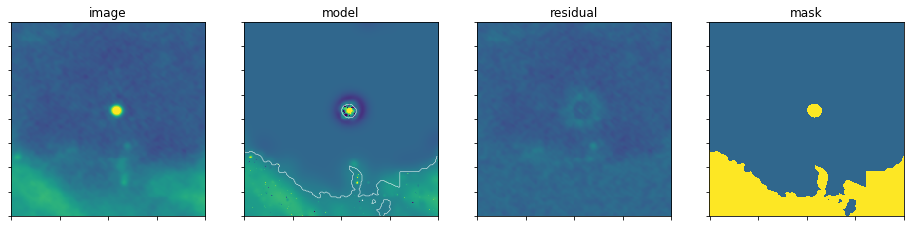

In [35]:
show(imgs_after6_b3, vmin=-0.001, vmax=0.0075, zoom=[slice(1950,2150), slice(2150,2350)])

In [36]:
from astropy import stats
for imgs in (imgs_before_b3, imgs_after_b3, imgs_after2_b3, imgs_after3_b3, imgs_after4_b3, imgs_after5_b3, imgs_after6_b3, ):#imgs_after7_b3):
    rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam) # residual has bad header units
    peak = np.nanmax(imgs['image'].quantity)
    total = np.nansum(imgs['image'].quantity)
    postotal = (imgs['image'].quantity[imgs['image'].value>0]).sum()
    rms2 = stats.mad_std(imgs['image'].quantity, ignore_nan=True)
    beam = imgs['image'].beam
    print(f"pk/rms={peak/rms:6.1f}, pk/mad={peak/rms2:6.1f}, pk={peak:0.3f}, total={total:0.3f}, postotal={postotal:0.3f}, rms={rms:0.5f}, mad={rms2:0.5f},"
          f" beam={beam.major.value:0.2f}x{beam.minor.value:0.2f}")

/lustre/naasc/users/aginsbur/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


pk/rms= 589.6, pk/mad= 870.7, pk=0.266 Jy / beam, total=176.968 Jy / beam, postotal=1310.711 Jy / beam, rms=0.00045 Jy / beam, mad=0.00031 Jy / beam, beam=0.29x0.26
pk/rms=1227.0, pk/mad=2761.8, pk=0.409 Jy / beam, total=176.580 Jy / beam, postotal=869.431 Jy / beam, rms=0.00033 Jy / beam, mad=0.00015 Jy / beam, beam=0.29x0.26
pk/rms=2297.3, pk/mad=3527.9, pk=0.410 Jy / beam, total=283.565 Jy / beam, postotal=735.067 Jy / beam, rms=0.00018 Jy / beam, mad=0.00012 Jy / beam, beam=0.29x0.26
pk/rms=3740.7, pk/mad=4218.7, pk=0.410 Jy / beam, total=398.153 Jy / beam, postotal=712.431 Jy / beam, rms=0.00011 Jy / beam, mad=0.00010 Jy / beam, beam=0.29x0.26
pk/rms=3847.3, pk/mad=4346.9, pk=0.410 Jy / beam, total=408.235 Jy / beam, postotal=713.132 Jy / beam, rms=0.00011 Jy / beam, mad=0.00009 Jy / beam, beam=0.29x0.26
pk/rms=4593.7, pk/mad=4685.6, pk=0.410 Jy / beam, total=448.358 Jy / beam, postotal=707.358 Jy / beam, rms=0.00009 Jy / beam, mad=0.00009 Jy / beam, beam=0.29x0.26
pk/rms=5397.1, 

In [37]:
from astropy import stats
print("RMS of residual comparisons")
for imgs in (imgs_before_b3, imgs_after_b3, imgs_after2_b3, imgs_after3_b3, imgs_after4_b3, imgs_after5_b3, imgs_after6_b3, imgs_after7_b3):
    resid_rms = np.nanstd(imgs['residual'].value*u.Jy/u.beam).to(u.mJy/u.beam) # residual has bad header units
    image_rms = np.nanstd(imgs['image'].quantity).to(u.mJy/u.beam)
    image_madstd = stats.mad_std(imgs['image'].quantity, ignore_nan=True).to(u.mJy/u.beam)
    resid_madstd = stats.mad_std(imgs['residual'].value*u.Jy/u.beam, ignore_nan=True).to(u.mJy/u.beam)
   
    print(f"resid rms={resid_rms:0.5f}, resid_mad={resid_madstd:0.5f},"
          f"image rms={image_rms:0.5f}, image_mad={image_madstd:0.5f}")
          

RMS of residual comparisons
resid rms=0.45074 mJy / beam, resid_mad=0.28169 mJy / beam,image rms=0.82382 mJy / beam, image_mad=0.30520 mJy / beam
resid rms=0.33313 mJy / beam, resid_mad=0.13084 mJy / beam,image rms=0.94748 mJy / beam, image_mad=0.14800 mJy / beam
resid rms=0.17849 mJy / beam, resid_mad=0.10168 mJy / beam,image rms=0.90989 mJy / beam, image_mad=0.11623 mJy / beam
resid rms=0.10973 mJy / beam, resid_mad=0.08183 mJy / beam,image rms=0.90897 mJy / beam, image_mad=0.09730 mJy / beam
resid rms=0.10668 mJy / beam, resid_mad=0.07928 mJy / beam,image rms=0.90931 mJy / beam, image_mad=0.09442 mJy / beam
resid rms=0.08932 mJy / beam, resid_mad=0.07173 mJy / beam,image rms=0.90829 mJy / beam, image_mad=0.08757 mJy / beam
resid rms=0.07582 mJy / beam, resid_mad=0.06154 mJy / beam,image rms=0.90258 mJy / beam, image_mad=0.07561 mJy / beam
resid rms=0.07542 mJy / beam, resid_mad=0.06166 mJy / beam,image rms=0.90030 mJy / beam, image_mad=0.07561 mJy / beam


# Compare first iteration (no selfcal) to full selfcal

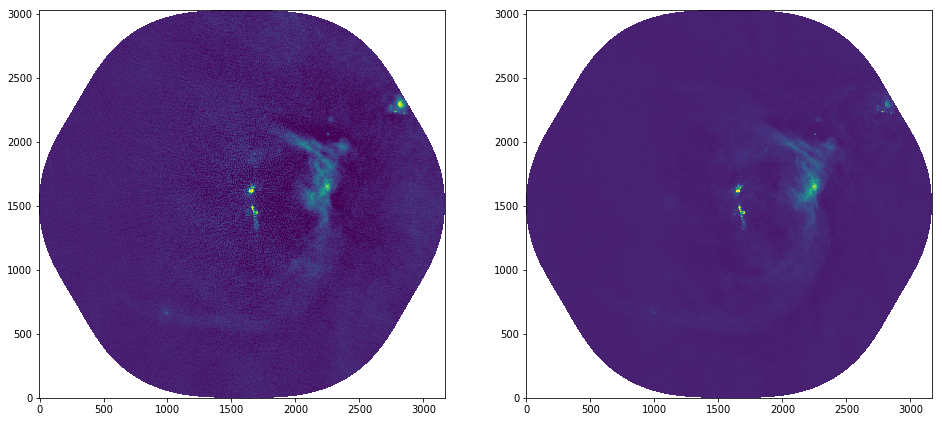

In [38]:
pl.subplot(1,2,1).imshow(imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
pl.subplot(1,2,2).imshow(imgs_after6_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.01)
#pl.subplot(1,3,3).imshow(imgs_after5_b6['image'].value-imgs_before_b6['image'].value, origin='lower', vmin=-0.01, vmax=0.01)

Compare the first and last iteration of phase-only selfcal to the first cleaned iteration

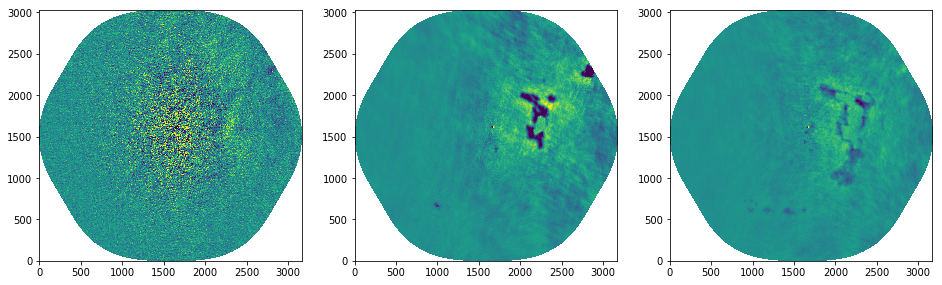

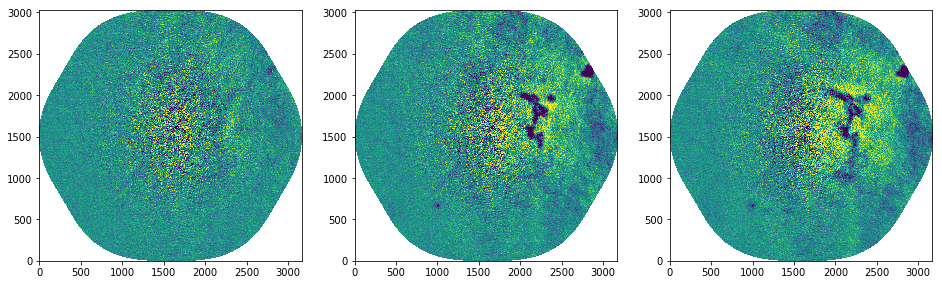

In [39]:
im = pl.subplot(1,3,1).imshow(imgs_after_b3['image'].value-imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001); #pl.colorbar(mappable=im)
im = pl.subplot(1,3,2).imshow(imgs_after2_b3['image'].value-imgs_after_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001); #pl.colorbar(mappable=im)
im = pl.subplot(1,3,3).imshow(imgs_after3_b3['image'].value-imgs_after2_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001); #pl.colorbar(mappable=im)

pl.figure()
im = pl.subplot(1,3,1).imshow(imgs_after_b3['image'].value-imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001); #pl.colorbar(mappable=im)
im = pl.subplot(1,3,2).imshow(imgs_after2_b3['image'].value-imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001); #pl.colorbar(mappable=im)
im = pl.subplot(1,3,3).imshow(imgs_after3_b3['image'].value-imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001); #pl.colorbar(mappable=im)

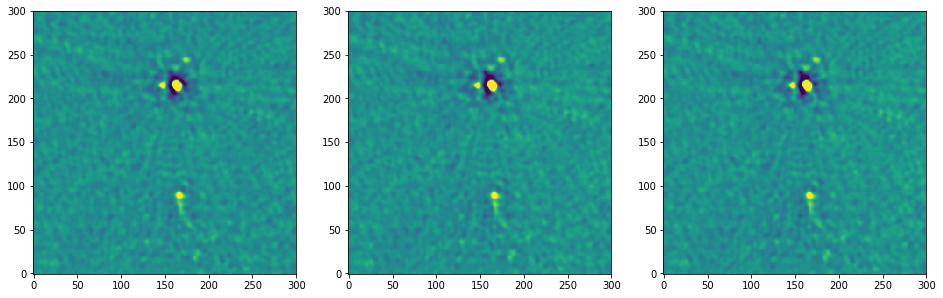

In [40]:
im = pl.subplot(1,3,1).imshow((imgs_after_b3['image'].value-imgs_before_b3['image'].value)[1400:1700,1500:1800], origin='lower', vmin=-0.01, vmax=0.01);
im = pl.subplot(1,3,2).imshow((imgs_after2_b3['image'].value-imgs_before_b3['image'].value)[1400:1700,1500:1800], origin='lower', vmin=-0.01, vmax=0.01);
im = pl.subplot(1,3,3).imshow((imgs_after3_b3['image'].value-imgs_before_b3['image'].value)[1400:1700,1500:1800], origin='lower', vmin=-0.01, vmax=0.01);

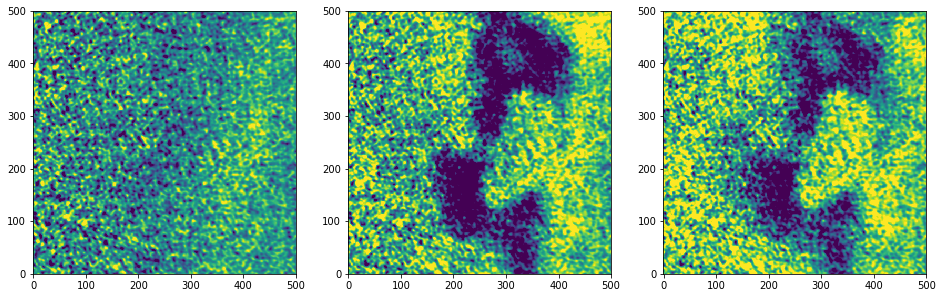

In [41]:
im = pl.subplot(1,3,1).imshow((imgs_after_b3['image'].value-imgs_before_b3['image'].value)[1400:1900,1900:2400], origin='lower', vmin=-0.001, vmax=0.001);
im = pl.subplot(1,3,2).imshow((imgs_after2_b3['image'].value-imgs_before_b3['image'].value)[1400:1900,1900:2400], origin='lower', vmin=-0.001, vmax=0.001);
im = pl.subplot(1,3,3).imshow((imgs_after3_b3['image'].value-imgs_before_b3['image'].value)[1400:1900,1900:2400], origin='lower', vmin=-0.001, vmax=0.001);

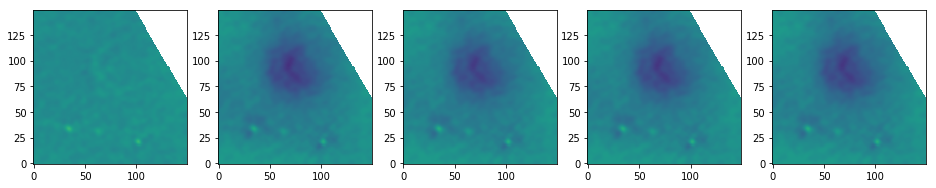

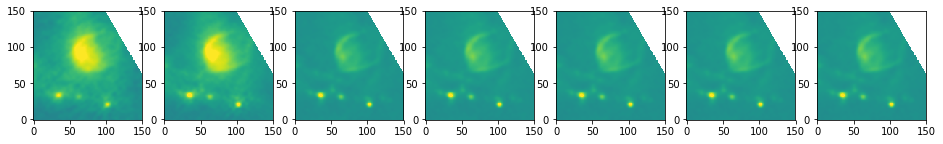

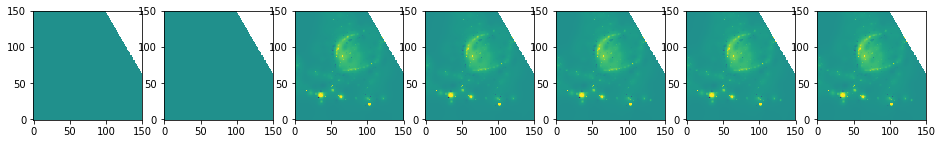

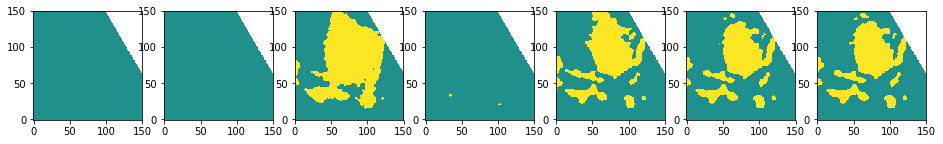

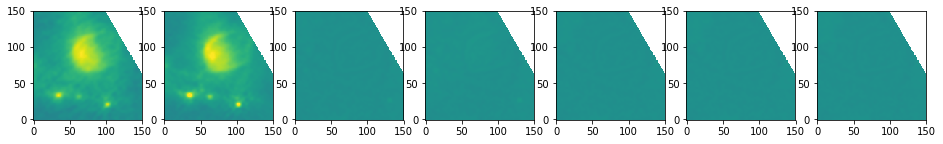

In [42]:
slc = slice(2200,2350),slice(2750,2900)
im = pl.subplot(1,5,1).imshow((imgs_after_b3['image'].value-imgs_before_b3['image'].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
im = pl.subplot(1,5,2).imshow((imgs_after2_b3['image'].value-imgs_before_b3['image'].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
im = pl.subplot(1,5,3).imshow((imgs_after3_b3['image'].value-imgs_before_b3['image'].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
im = pl.subplot(1,5,4).imshow((imgs_after4_b3['image'].value-imgs_before_b3['image'].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
im = pl.subplot(1,5,5).imshow((imgs_after5_b3['image'].value-imgs_before_b3['image'].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);

for imtype in ('image', 'model', 'mask', 'residual'):
    pl.figure()
    im = pl.subplot(1,7,1).imshow((imgs_before_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,2).imshow((imgs_after_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,3).imshow((imgs_after2_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,4).imshow((imgs_after3_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,5).imshow((imgs_after4_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,6).imshow((imgs_after5_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,7).imshow((imgs_after6_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);


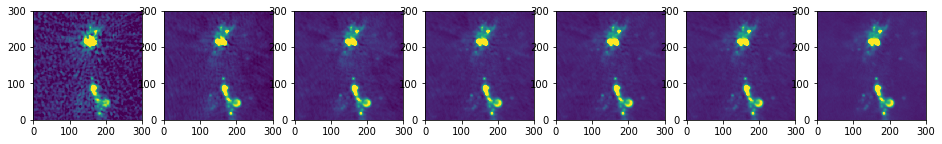

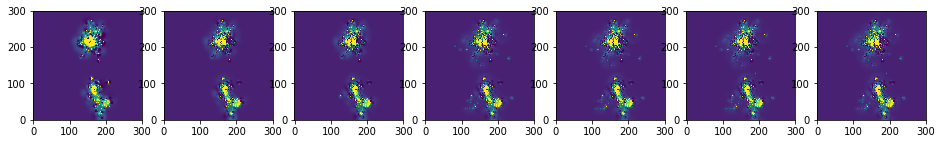

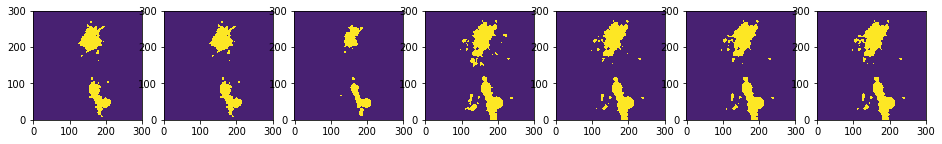

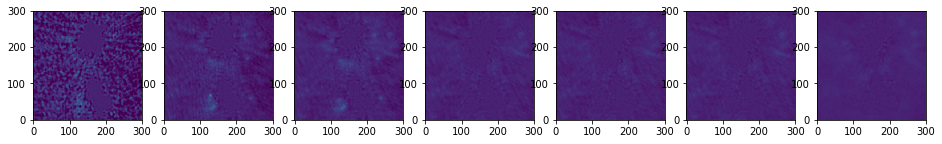

In [43]:
slc = slice(1400,1700),slice(1500,1800)
for imtype in ('image', 'model', 'mask', 'residual'):
    pl.figure()
    im = pl.subplot(1,7,1).imshow((imgs_before_b3[imtype].value)[slc], origin='lower', vmin=-0.001, vmax=0.01);
    im = pl.subplot(1,7,2).imshow((imgs_after_b3[imtype].value)[slc], origin='lower', vmin=-0.001, vmax=0.01);
    im = pl.subplot(1,7,3).imshow((imgs_after2_b3[imtype].value)[slc], origin='lower', vmin=-0.001, vmax=0.01);
    im = pl.subplot(1,7,4).imshow((imgs_after3_b3[imtype].value)[slc], origin='lower', vmin=-0.001, vmax=0.01);
    im = pl.subplot(1,7,5).imshow((imgs_after4_b3[imtype].value)[slc], origin='lower', vmin=-0.001, vmax=0.01);
    im = pl.subplot(1,7,6).imshow((imgs_after5_b3[imtype].value)[slc], origin='lower', vmin=-0.001, vmax=0.01);
    im = pl.subplot(1,7,7).imshow((imgs_after6_b3[imtype].value)[slc], origin='lower', vmin=-0.001, vmax=0.01);

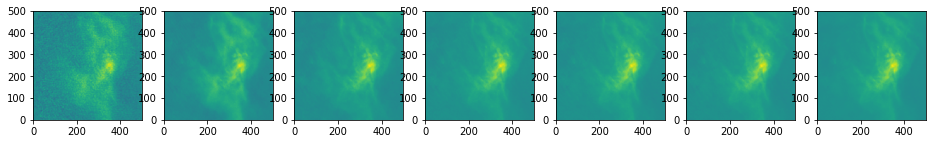

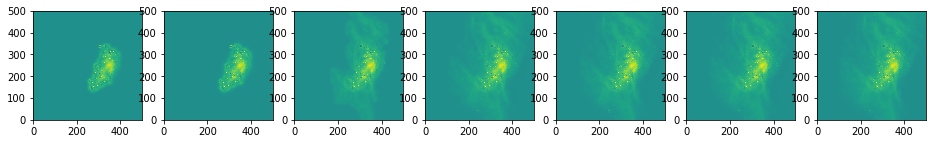

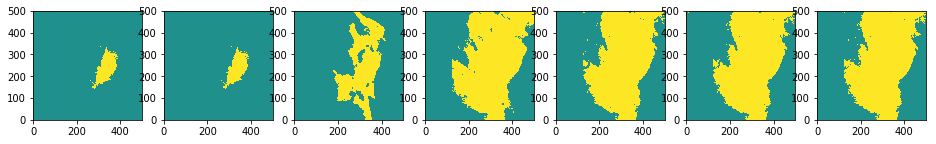

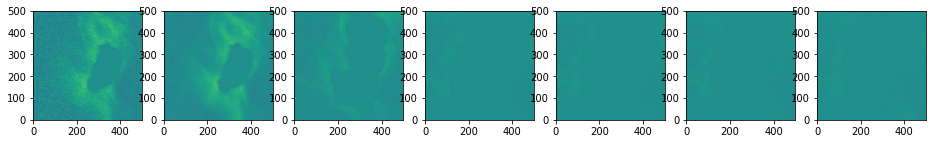

In [44]:
slc = slice(1400,1900),slice(1900,2400)
for imtype in ('image', 'model', 'mask', 'residual'):
    pl.figure()
    im = pl.subplot(1,7,1).imshow((imgs_before_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,2).imshow((imgs_after_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,3).imshow((imgs_after2_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,4).imshow((imgs_after3_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,5).imshow((imgs_after4_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,6).imshow((imgs_after5_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);
    im = pl.subplot(1,7,7).imshow((imgs_after6_b3[imtype].value)[slc], origin='lower', vmin=-0.01, vmax=0.01);

Compare the last iteration of amplitude selfcal to the first cleaned iteration to see if we lost flux

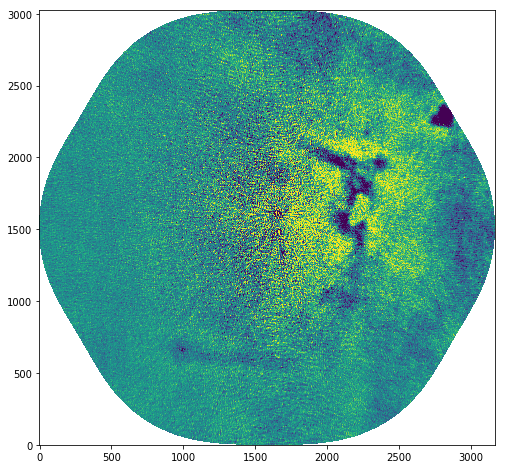

In [45]:
pl.gca().imshow(imgs_after7_b3['image'].value-imgs_before_b3['image'].value, origin='lower', vmin=-0.001, vmax=0.001)

# Final iteration, robust 2 and robust -2

In [46]:
imgs_after7_b3_r2, cubes_after7_b3_r2 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7')

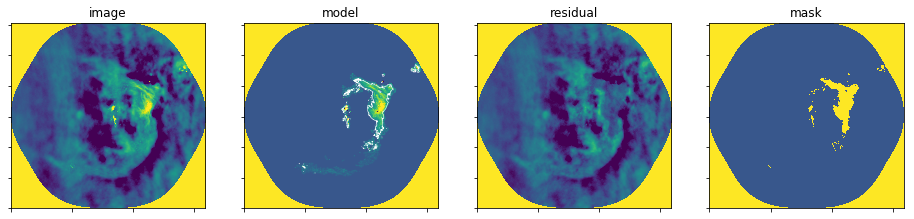

In [47]:
show(imgs_after7_b3_r2, vmin=-0.001, vmax=0.01)

In [48]:
imgs_after7_b3_rm2, cubes_after7_b3_rm2 = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust-2_selfcal7')

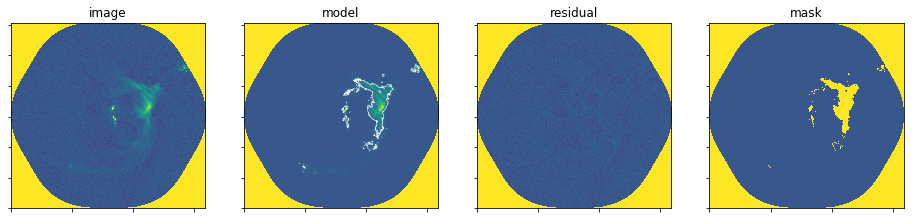

In [49]:
show(imgs_after7_b3_rm2, vmin=-0.001, vmax=0.01)

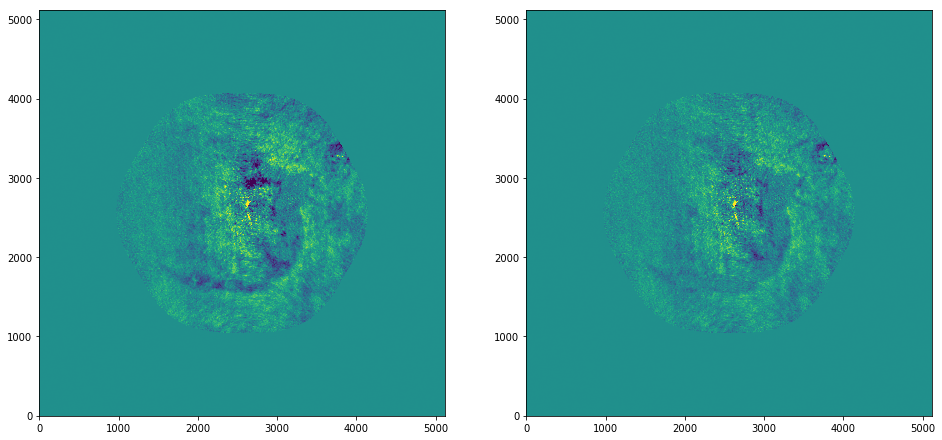

In [50]:
selfcal3_tt1 = SpectralCube.read('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal3.image.tt1', format='casa_image')
selfcal5_tt1 = SpectralCube.read('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust0_selfcal5.image.tt1', format='casa_image')
pl.subplot(1,2,1).imshow(selfcal3_tt1[0].value, vmin=-0.01, vmax=0.01, origin='lower')
pl.subplot(1,2,2).imshow(selfcal5_tt1[0].value, vmin=-0.01, vmax=0.01, origin='lower')

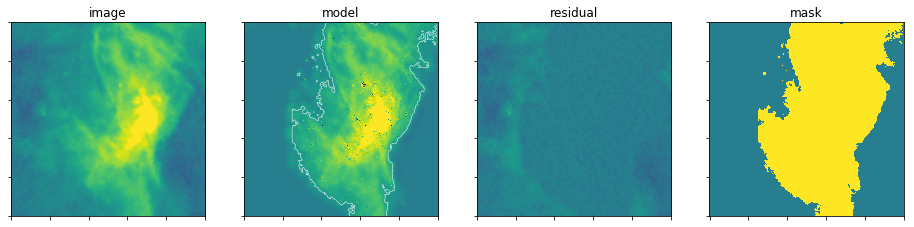

In [52]:
#pl.imshow(imgs_after6_b3['residual'][2500-1022:2800-1022,3070-980:3370-980].value, origin='lower', interpolation='none')
#pl.colorbar()
show(imgs_after7_b3, [slice(1400,1900), slice(1900, 2400)], vmax=0.005, vmin=-0.001)

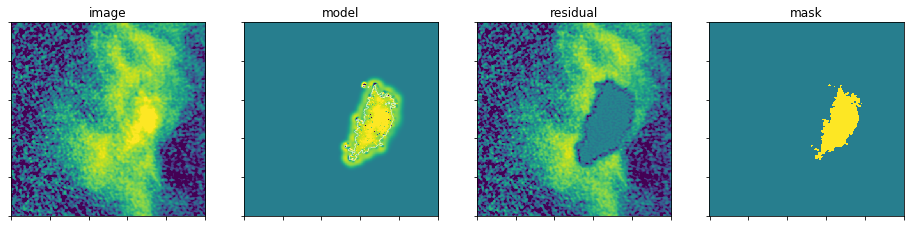

In [53]:
show(imgs_before_b3, [slice(1400,1900), slice(1900, 2400)], vmax=0.005, vmin=-0.001)

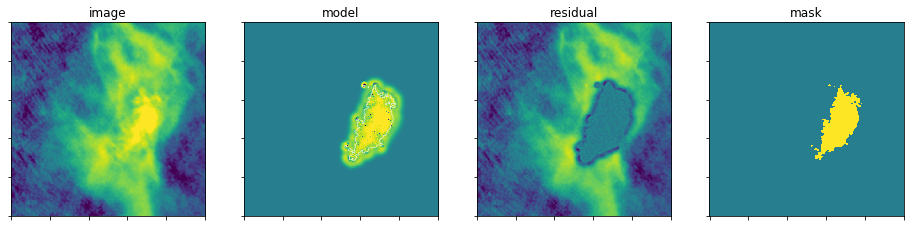

In [54]:
show(imgs_after_b3, [slice(1400,1900), slice(1900, 2400)], vmax=0.005, vmin=-0.001)

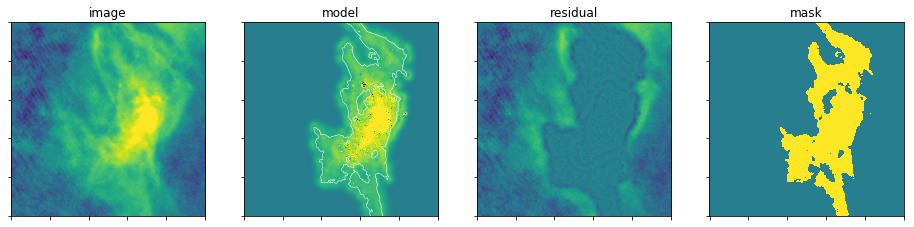

In [55]:
show(imgs_after2_b3, [slice(1400,1900), slice(1900, 2400)], vmax=0.005, vmin=-0.001)

### A step further:
It looks like the Robust 2 image might be OK after all, as long as we box well

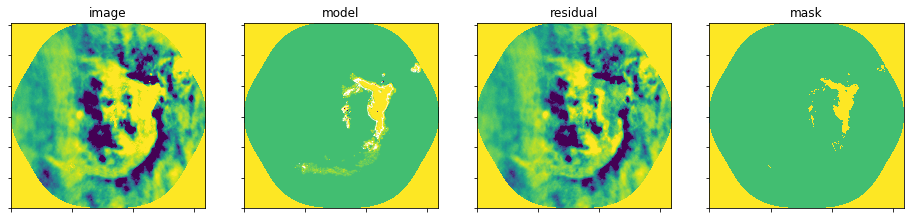

In [64]:
show(imgs_after7_b3_r2, vmin=-0.001, vmax=0.0015)

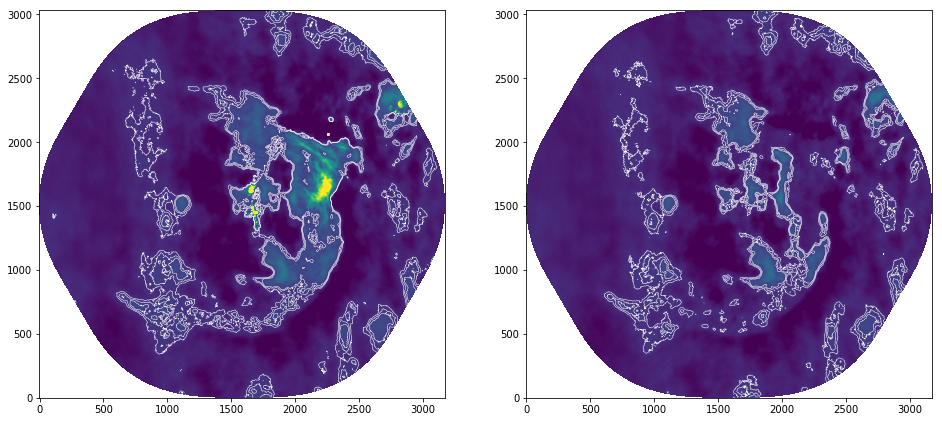

In [61]:
pl.subplot(1,2,1)
pl.imshow(imgs_after7_b3_r2['image'].value, vmin=-0.001, vmax=0.01, origin='lower')
pl.contour(imgs_after7_b3_r2['image'].value, levels=[0.0005, 0.00075, 0.001], colors=['w']*3, linewidths=[0.5]*3)
pl.subplot(1,2,2)
pl.imshow(imgs_after7_b3_r2['residual'].value, vmin=-0.001, vmax=0.01, origin='lower')
pl.contour(imgs_after7_b3_r2['residual'].value, levels=[0.0005, 0.00075, 0.001], colors=['w']*3, linewidths=[0.5]*3)

It looks like all of the stuff in the center is OK, so we just need to exclude the large streak on the left.

This code creates a custom mask that is intended to exclude the left streak but include most everything else:

In [36]:
from make_custom_mask import make_custom_mask

In [38]:
field = 'W51-E'
imname = 'W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7'
band = 'B3'
imaging_root = os.getcwd()
robust = 2
arrayname = '12M'
os.environ['ALMAIMF_ROOTDIR'] = '/lustre/naasc/users/aginsbur/repos/reduction/reduction/'
maskname = make_custom_mask(field, imname+".image.tt0",
                                        os.getenv('ALMAIMF_ROOTDIR'),
                                        band,
                                        rootdir=imaging_root,
                                        suffix='_selfcal7_robust{0}_{1}'.format(robust, arrayname)
                                       )
maskname

Using region file /lustre/naasc/users/aginsbur/repos/reduction/reduction/clean_regions/W51-E_B3_selfcal7_robust2_12M.reg to create mask


'/lustre/lard/projects/ALMA_IMF/2017.1.01355.L/imaging_results/W51-E_B3_selfcal7_robust2_12M_mask.mask'

Text(0.5, 1.0, 'Custom Mask')

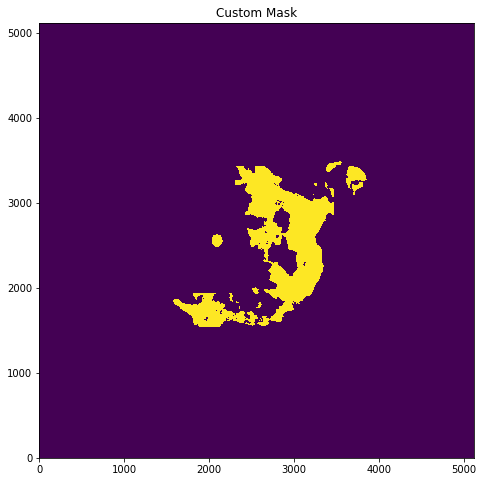

In [39]:
mask = SpectralCube.read(maskname, format='casa_image')[0]
pl.imshow(mask.value, origin='lower', interpolation='none')
pl.title("Custom Mask")

With that custom mask, I re-ran clean using the model from the 7th iteration of selfcal cleaning as a start model.

The first-pass version of this had the mask on IRS2 (the source in the top right) going right to the edge of the field, which resulted in divergence during the clean.  Be wary of masks that go to the edge!

In [43]:
r2reclean_ims, r2reclean_cubes = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7_reclean')

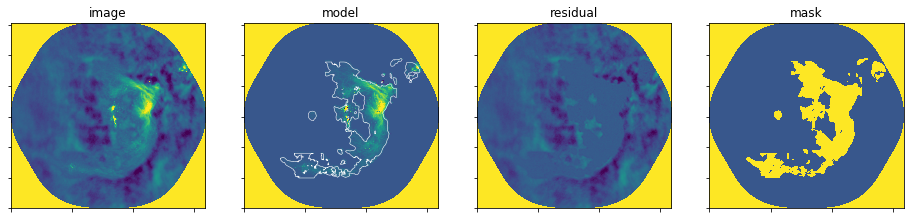

In [44]:
show(r2reclean_ims, vmin=-0.001, vmax=0.01)

This is the area that ended up with some very nasty edge-related effects:

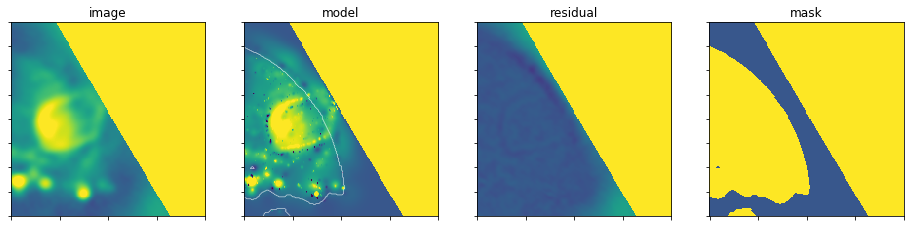

In [47]:
show(r2reclean_ims, (slice(2200,2400),slice(2780,2980)), vmin=-0.001, vmax=0.01, )

This is the (complete) clean command for the above:
```    
tclean(vis="W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_selfcal.ms",selectdata=True,field="W51-E",spw="",timerange="",
        uvrange="",antenna="",scan="",observation="",intent="",
        datacolumn="corrected",imagename="imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7_reclean",imsize=[5120, 5120],cell=['0.05arcsec', '0.05arcsec'],phasecenter="ICRS 290.934083333
deg 14.5088528912deg",
        stokes="I",projection="SIN",startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7.model.tt0', 'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust
2_selfcal7.model.tt1'],specmode="mfs",reffreq="",
        nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
        restfreq=[],interpolation="linear",gridder="mosaic",facets=1,chanchunks=1,
        wprojplanes=1,vptable="",usepointing=False,mosweight=True,aterm=True,      ...:         psterm=False,wbawp=True,conjbeams=False,cfcache="",computepastep=360.0,      ...:         rotatepastep=360.0,pblimit=0.1,normtype="flatnoise",deconvolver="mtmfs",scales=[0, 3, 9, 27],      ...:         nterms=2,smallscalebias=0.6,restoration=True,restoringbeam=[],pbcor=True,
        outlierfile="",weighting="briggs",robust=2,npixels=0,uvtaper=[],
        niter=100000,gain=0.1,threshold="0.15mJy",nsigma=0.0,cycleniter=-1,
        cyclefactor=1.0,minpsffraction=0.05,maxpsffraction=0.8,interactive=False,usemask="user",
        mask="imaging_results/W51-E_B3_selfcal7_robust2_12M_mask.mask",pbmask=0.0,sidelobethreshold=3.0,noisethreshold=5.0,lownoisethreshold=1.5,
        negativethreshold=0.0,smoothfactor=1.0,minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,
        dogrowprune=True,minpercentchange=-1.0,verbose=False,restart=True,savemodel="none",
        calcres=True,calcpsf=True,parallel=False)
```

This is to go deeper.  I'll make a pb-based mask below to minimize those edge effects.  Note that this finishes on niter, not on threshold.

```
tclean(vis="W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_selfcal.ms",
       selectdata=True,field="W51-E",spw="",timerange="",
       uvrange="",antenna="",scan="",observation="",intent="",
       datacolumn="corrected",imagename="imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7_reclean_deeper",imsize=[5120, 5120],cell=['0.05arcsec', '0.05arcsec'],
       phasecenter="ICRS 290.934083333deg 14.5088528912deg",
       stokes="I",projection="SIN",
       startmodel=['imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7_reclean.model.tt0',
                   'imaging_results/W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7_reclean.model.tt1'],
       specmode="mfs",reffreq="",
       nchan=-1,start="",width="",outframe="LSRK",veltype="radio",
       restfreq=[],interpolation="linear",gridder="mosaic",facets=1,chanchunks=1,
       wprojplanes=1,vptable="",usepointing=False,mosweight=True,aterm=True,
       psterm=False,wbawp=True,conjbeams=False,cfcache="",computepastep=360.0, 
       rotatepastep=360.0,pblimit=0.1,normtype="flatnoise",deconvolver="mtmfs",scales=[0, 3, 9, 27],      
       nterms=2,smallscalebias=0.6,restoration=True,restoringbeam=[],pbcor=True,
       outlierfile="",weighting="briggs",robust=2,npixels=0,uvtaper=[],
       niter=20000,gain=0.1,threshold="0.15mJy",nsigma=0.0,cycleniter=-1,
       cyclefactor=1.0,minpsffraction=0.05,maxpsffraction=0.8,interactive=False,usemask="user",
       mask="imaging_results/W51-E_B3_selfcal7_robust2_12M_deeper_mask.mask",pbmask=0.0,sidelobethreshold=3.0,
       noisethreshold=5.0,lownoisethreshold=1.5,
       negativethreshold=0.0,smoothfactor=1.0,minbeamfrac=0.3,cutthreshold=0.01,growiterations=75,
       dogrowprune=True,minpercentchange=-1.0,verbose=False,restart=True,savemodel="none",
       calcres=True,calcpsf=True,parallel=False)
 ```

In [50]:
from casatools import image
image = image()

In [59]:
image.open("W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7_reclean.pb.tt0")
pbdata = image.getchunk()
cs = image.coordsys()
image.close()

True

In [60]:
# mask out just the edges
maskarr = pbdata > 0.105
image.fromarray(outfile='W51-E_B3_selfcal7_robust2_12M_deeper_mask.mask',
                        pixels=maskarr.astype('float'),
                        csys=cs.torecord(), overwrite=True)
image.close()

True

In [70]:
r2deeperreclean_ims, r2deeperreclean_cubes = load_images('W51-E_B3_uid___A001_X1296_X10b_continuum_merged_12M_robust2_selfcal7_reclean_deeper')

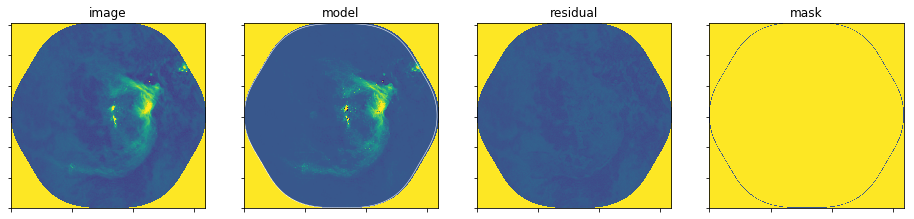

In [71]:
show(r2deeperreclean_ims, vmin=-0.001, vmax=0.01)